In [22]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from functions import read_folder, read_bz2, split_by_time, find_burst, plot_burst, build_graph, findQuasiClique, find_original,find_event

In [23]:
#read the whole folder
path = "prim/data"
keyword = 'nokia'

#some words are not useful for events detection. for example, there are many ads with 'phone'
list_ignore = ['phone','smartphone']

#you can also specify the number of files with num = 10, for example
terms_stop, dates, whole_tweets, num_tweet, duree = read_folder(path, keyword, list_ignore)

100%|██████████| 65/65 [16:09<00:00, 14.92s/it]


In [24]:
print 'Cost time in s: ' + str(duree)
print 'Total number of tweets:' + str(num_tweet)
print 'Number of tweets containing ' + str(keyword) +': ' + str(len(dates))

Cost time in s: 969.515999794
Total number of tweets:55034364
Number of tweets containing nokia: 2476


In [26]:
# define the length of period
accumulated_num, frequency = split_by_time(dates, periode= 60 * 60 * 20)
print 'There are totally '+str(len(frequency)) + ' periods.'
#print 'Accumulated number of tweets: ' + str(accumulated_num)
#print 'Frequency of tweets every perid: ' + str(frequency)

There are totally 74 periods.


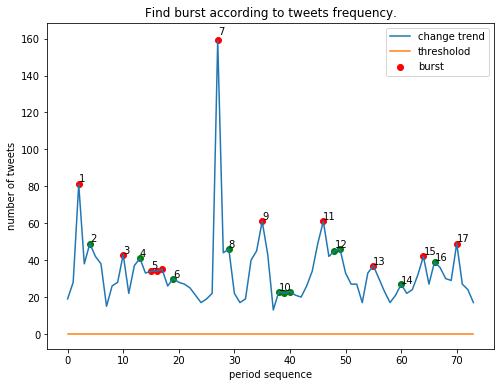

In [27]:
#plot a graph showing the location of bursts
n_burst = 40
threshold = 0
ind_burst, list_word = find_burst(frequency, accumulated_num,terms_stop, threshold, n_burst)
figsize = (8,6)
%matplotlib inline
plot_burst(ind_burst, figsize, frequency, threshold)

In [28]:
#quasi clique algorith
gamma = 0.45
numClique = 12
num_words = 150
ignore = 'iphone'
list_date, list_whole, list_clique = find_event(keyword, ignore, ind_burst, list_word, accumulated_num, terms_stop, whole_tweets, dates)

In [29]:
#how many events detected from the given bursts
len(list_date)

8

In [30]:
#print the tweets corresponding to cliques
for i in list_whole:
    print i
    print " "

The Nokia 6 (2018) arrives with a big spec upgrade and on-screen buttons
 
RT @nokia: Federico Guillén on "The power of AND": Combining fixed and  wireless to connect people sooner. He urges to leverag… 
 
RT @GetIDShield: Nokia says third-party Android app stores need to raise their game to improve overall Android security. What do you… 
 
RT @digitindia: Nokia 2 with #Android Nougat, 4100 mAh battery, Snapdragon 212 launched in India at Rs 6,999 with bundled Jio data… 
 
Android Nokia 9 squares up to Apple iPhone X with 5.5-inch OLED screen
 
RT @freesimunlocker: This a a Premium and fast Service for all Bell Nokia. This service will unlock Clean/Blocked/Blacklisted
Delivery T… 
 
RT @MyHauteLife: Taking you through the top 5 tourist attractions in Dubai with my Nokia 8's dual side camera 🤗 #Nokia8 #Bothie
@nokiamobil…
 
RT @tech2eets: It doesn't look like the @Nokia 9 would have a full-screen display, however, the second gen Nokia 8 has been tipped… 
 


In [31]:
#save the results in excel or show it
df_p = pd.DataFrame({'Date': list_date, 'Clique Words': list_clique, 'Tweets':list_whole})
df_p = df_p.sort_values('Date')
df_p
#df_p.to_excel(str(keyword)+'20.xlsx', sheet_name='sheet1', index=False)

,Clique Words,Date,Tweets
2,"[nokia, security, stores, overall, game, app, ...",2017-11-15 06:20:49,RT @GetIDShield: Nokia says third-party Androi...
3,"[nokia, battery, india, launched, jio, nougat,...",2017-11-23 12:09:02,"RT @digitindia: Nokia 2 with #Android Nougat, ..."
5,"[nokia, unlock, delivery, clean, fast, premium...",2017-11-28 13:58:44,RT @freesimunlocker: This a a Premium and fast...
7,"[nokia, screen, however, gen, full, display, t...",2017-12-05 04:58:31,RT @tech2eets: It doesn't look like the @Nokia...
1,"[nokia, fixed, guill, combining, power, wirele...",2017-12-12 10:27:03,"RT @nokia: Federico Guillén on ""The power of A..."
4,"[nokia, screen, android, squares, apple, oled,...",2017-12-23 05:03:43,Android Nokia 9 squares up to Apple iPhone X w...
6,"[nokia, screen, taking, attractions, side, top...",2017-12-29 05:31:43,RT @MyHauteLife: Taking you through the top 5 ...
0,"[nokia, screen, upgrade, spec, buttons, arrive...",2018-01-06 02:27:34,The Nokia 6 (2018) arrives with a big spec upg...
